# Linear Regression

Linear regression is the simplest and classical regression model. Suppose that the input $x$ is $d$
 dimension and the prediction target $y$
 is a continuous type taking values. The linear regression is modeled as $𝑦 = 𝑤_0 + 𝑤_1𝑥_1 + ... + 𝑤_𝑑𝑥_𝑑$
 .

In this case we will use the Boston house price dataset with the help of sklearn tool. Demonstrate how to perform linear regression modeling and evaluate the regression modeling effects. 

There are various tools in Python that can help us perform linear regression, including NumPy, Scipy, stats, and sklearn. In this case we will use sklearn to complete the implementation of a linear regression model. The sklearn.linear_model module contains common linear models, i.e., models in which the prediction objective can be expressed as a linear combination of the input variables. Our example is based on the Boston house price dataset, which can be loaded using sklearn's own methods.



In [2]:


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


## Import data

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [4]:
data_df=pd.DataFrame(data)

In [5]:
data_df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE' ,'DIS' ,'RAD', 'TAX', 'PTRATIO','B' ,'LSTAT']

In [6]:
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
target.shape

(506,)

In [8]:
pd.isna(data_df).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
import seaborn as sns

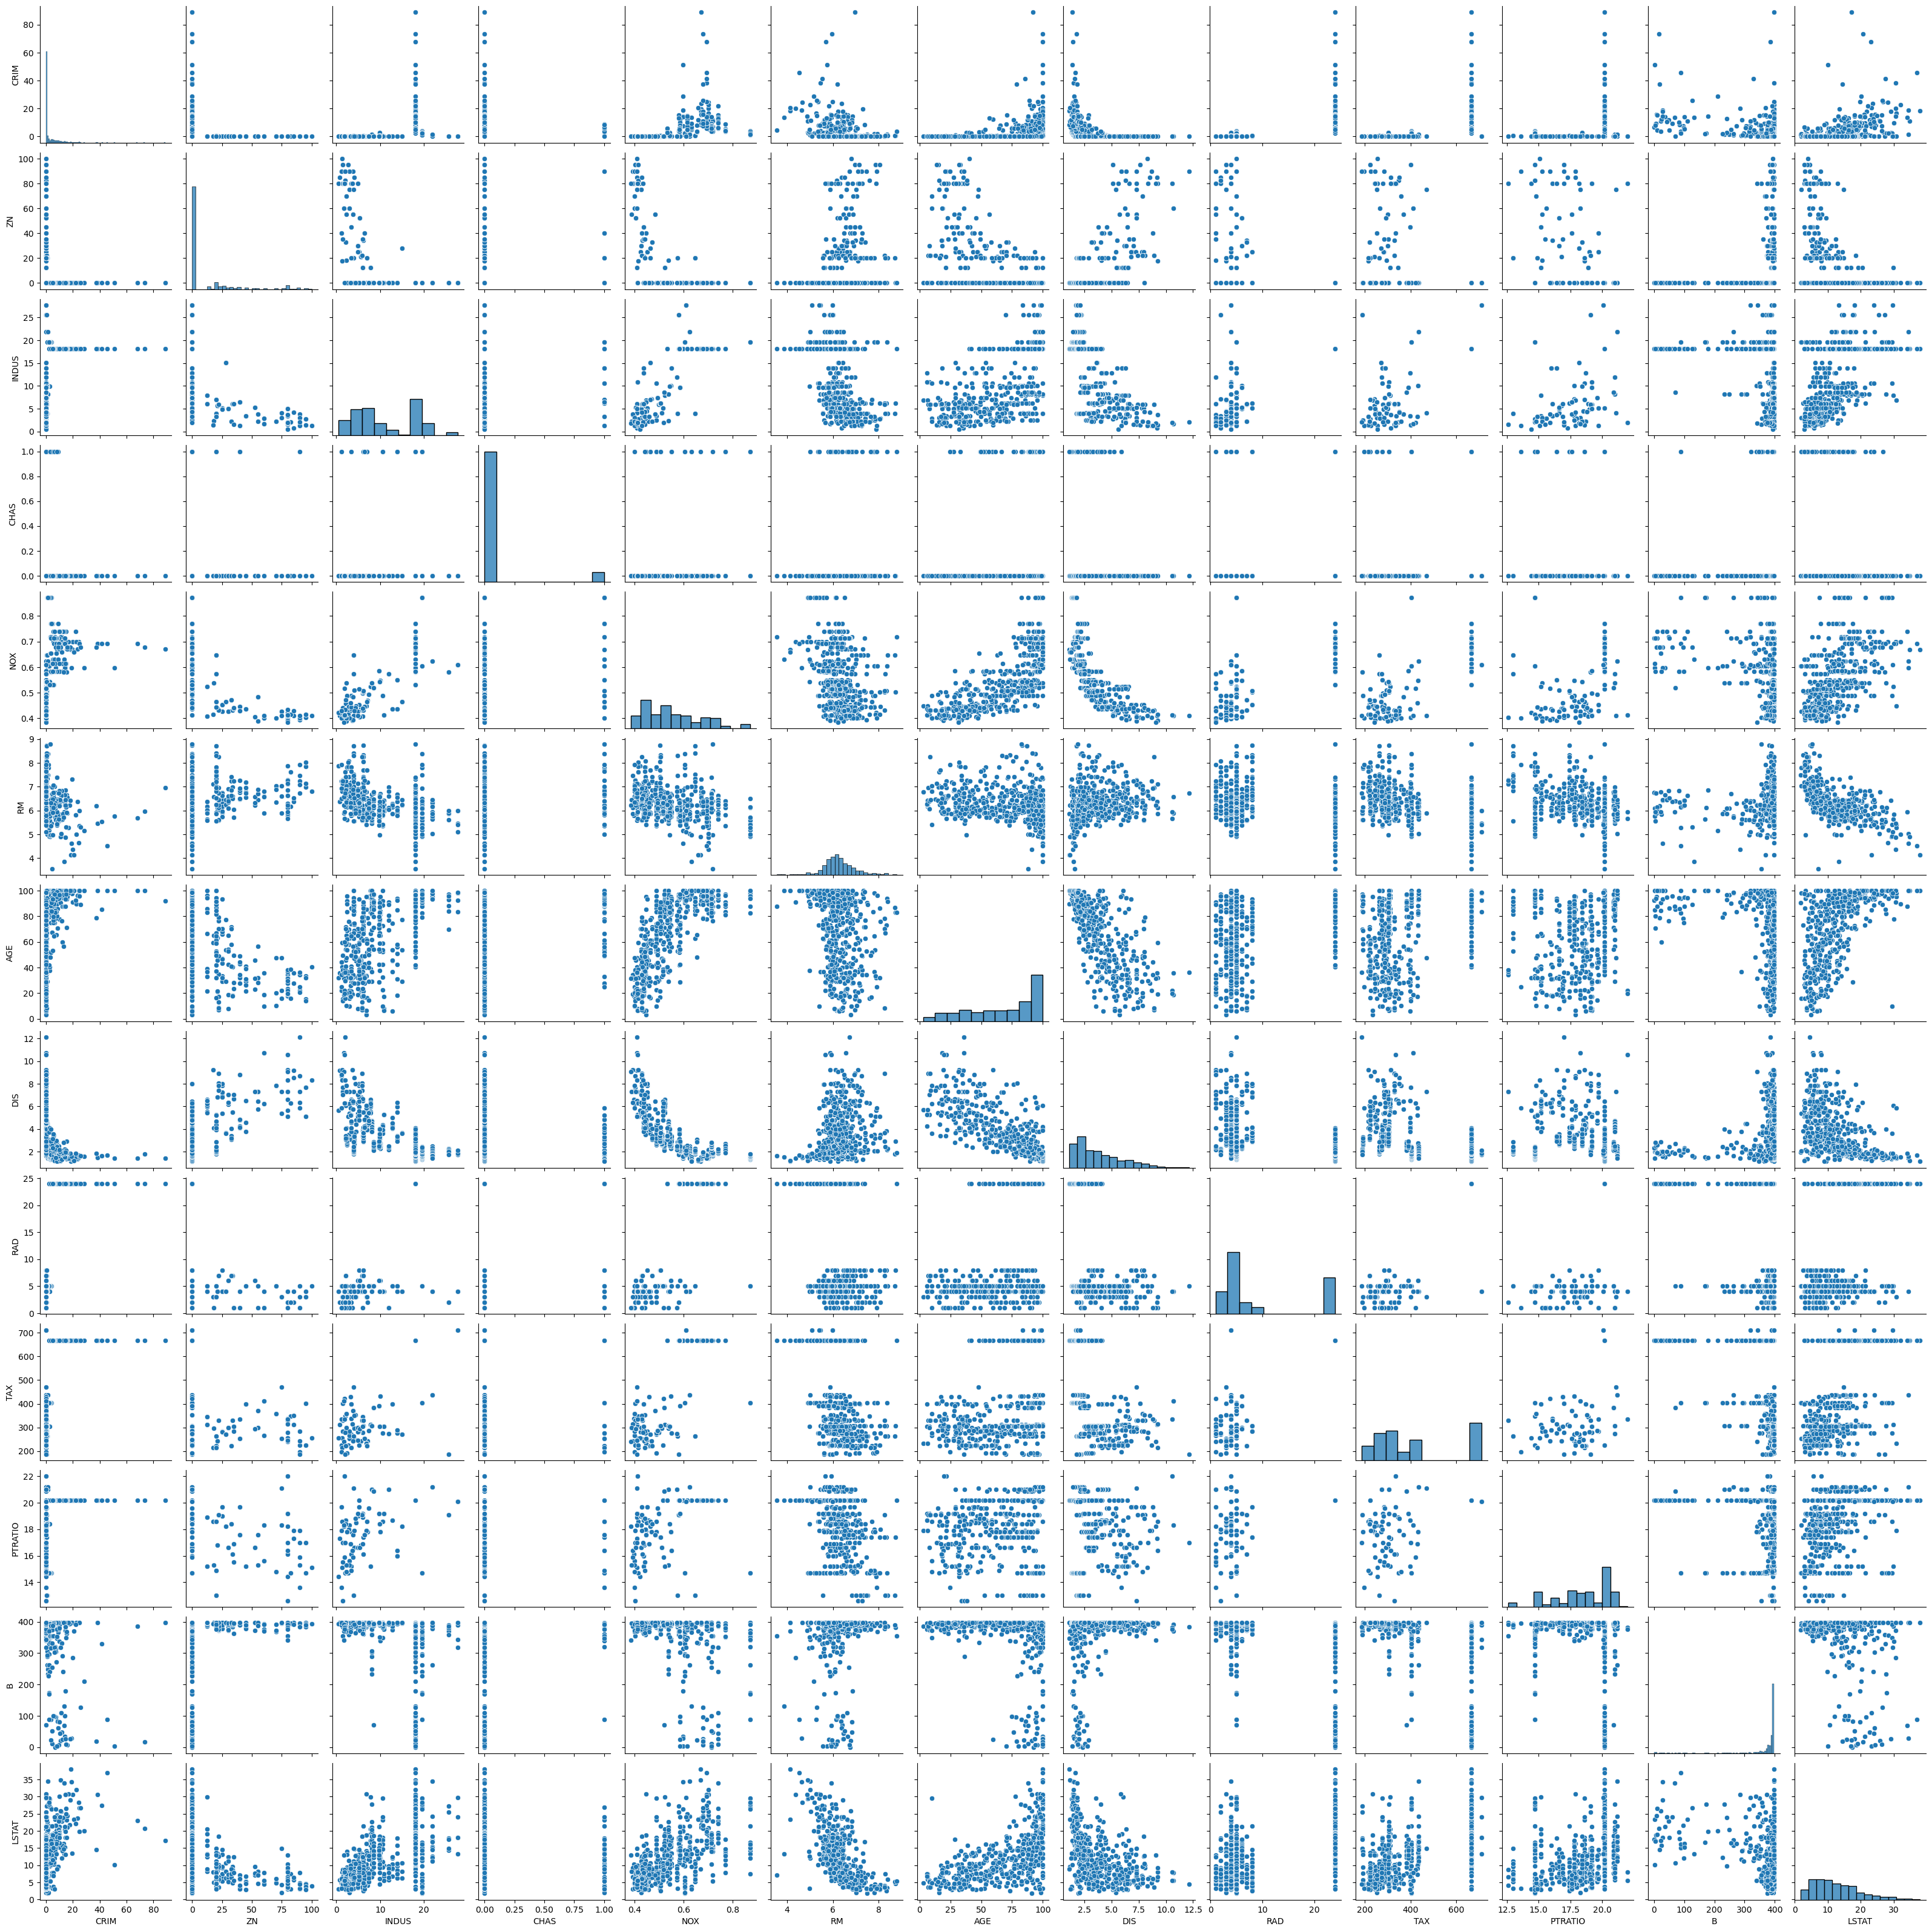

In [11]:
sns.pairplot(data_df)

## Linear prediction

Below we construct a house price prediction model via linear regression, with the regression coefficients estimated using least squares. In our example y = Boston house price. X = the rest of the input variables. First, we import the linear_model module of sklearn. Then the predictor variables are removed from the DataFrame. Finally a linear model object lm is created

In [12]:
from sklearn.linear_model import LinearRegression

X = data_df

lm = LinearRegression()
lm

LinearRegression()

Before we build the model further, we briefly introduce the LinearRegression class. It contains many methods, of which the following three are the ones we focus on using.

* lm.fit(): train a linear model
* lm.predict(): use the trained linear model to make a prediction
* lm.score(): returns the coefficient of determination of the linear model $R^2$.


After completing the model training, we can obtain the regression coefficients and intercepts via lm.coef_ and lm.intecept_.



In [13]:
lm.fit(X,target)

LinearRegression()

In [14]:
print("截距为：", lm.intercept_)
print ("回归系数为：", lm.coef_)

截距为： 36.459488385089806
回归系数为： [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [15]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=["特征","回归系数"])

,特征,回归系数
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


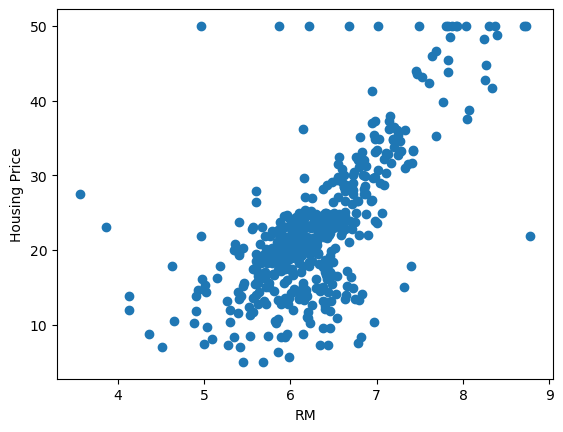

In [16]:
plt.scatter(data_df.RM,target)
plt.xlabel("RM")
plt.ylabel("Housing Price")
plt.show()

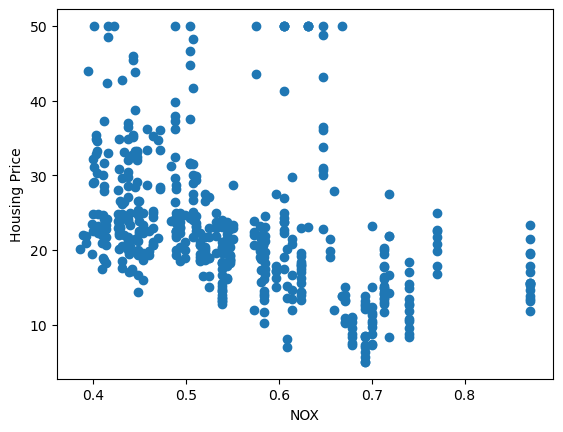

In [17]:
plt.scatter(data_df.NOX,target)
plt.xlabel("NOX")
plt.ylabel("Housing Price")
plt.show()

### Prediction

In [18]:
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

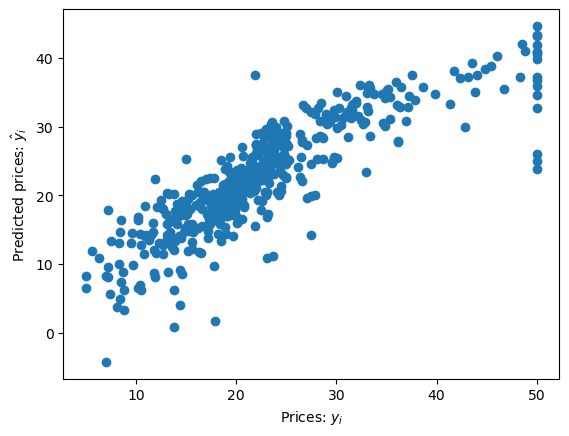

In [19]:
plt.scatter(target,lm.predict(X))
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.show()

It can be seen that the model does not predict house prices with 100% accuracy and the model will have prediction errors. Particularly in the case of high priced houses, the model's predictions are poor. The most common metric for assessing model error is the mean square error.

In [20]:
mseFull = np.mean((target - lm.predict(X))**2)
print(mseFull)

21.894831181729202


In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target, lm.predict(X)))

21.894831181729202


The above mean square error is calculated on the training set. In a real project we need a separate test data to test the model effect.

### Evaluation

In sklearn we can use the train_test_split method of the model_selection module for training set and test set splitting.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, target,
    test_size=0.1, random_state=10)

In [61]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [62]:
print ("训练误差为：", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("测试误差为：", np.mean((Y_test - lm.predict(X_test)) ** 2))

训练误差为： 22.42421229339694
测试误差为： 18.039512398039637


In [63]:
lm.score(X_test ,Y_test)

0.8412765520905378

A residual plot is a type of plot used to diagnose the effectiveness of a regression model. In a residual plot, if the points are randomly distributed around 0, the regression is good. If some kind of structure is found in the residual plot, the regression is not effective and needs to be re-modeled.

Text(0, 0.5, 'Residuals')

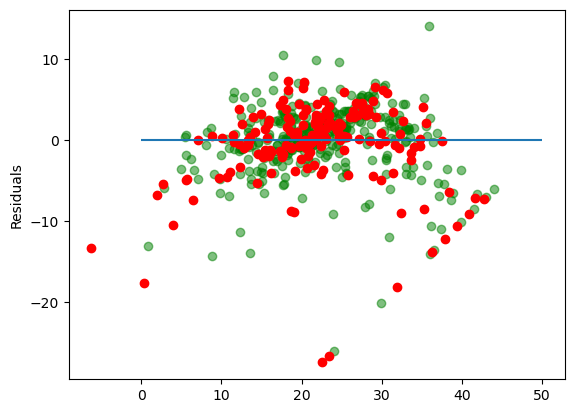

In [47]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c="g", alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c="r")
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")